<a href="https://colab.research.google.com/github/Seandaytoy1005/MMO/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

## Обработка признаков. Часть 1

##### Выполнил: Се Цзявэнь. ИУ5И-22М

### Задание

1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
- устранение пропусков в данных;
- кодирование категориальных признаков;
- нормализация числовых признаков.

### Описание исходного набора данных

Был выбран набор данных о диабете из sklearn. Для каждого из n = 442 пациентов с диабетом были получены десять исходных переменных: возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови, а также интересующий ответ - количественный показатель прогрессирования заболевания через год после исходного уровня. Переменные называются «AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y».


### Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes



### Загрузка датасета

In [ ]:
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
print(x.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
list(zip(diabetes.feature_names,[type(i) for i in x[0]]))

[('age', numpy.float64),
 ('sex', numpy.float64),
 ('bmi', numpy.float64),
 ('bp', numpy.float64),
 ('s1', numpy.float64),
 ('s2', numpy.float64),
 ('s3', numpy.float64),
 ('s4', numpy.float64),
 ('s5', numpy.float64),
 ('s6', numpy.float64)]

Поскольку в наборе данных нет недостающих данных, мы устанавливаем их здесь вручную.

In [ ]:
df = pd.DataFrame(x, columns=diabetes.feature_names)
df.iloc[0, 0] = np.nan
df.iloc[1, 2] = np.nan

In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,NaN,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,NaN,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204


from matplotlib import pyplot as plt
rows_with_null['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null.plot(kind='scatter', x='bp', y='s1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['s1']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_with_null.sort_values('s1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('s1')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['s1']
  ys = series['sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_with_null.sort_values('s1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('s1')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['s1']
  ys = series['bmi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_with_null.sort_values('s1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('s1')
_ = plt.ylabel('bmi')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['s1']
  ys = series['bp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_with_null.sort_values('s1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('s1')
_ = plt.ylabel('bp')

from matplotlib import pyplot as plt
rows_with_null['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rows_with_null['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_drop=df.dropna(axis=0,how='any')
print(df_drop.shape)

(440, 10)


### Устранение пропусков

Разница между распределениями до и после устранения пропусков

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

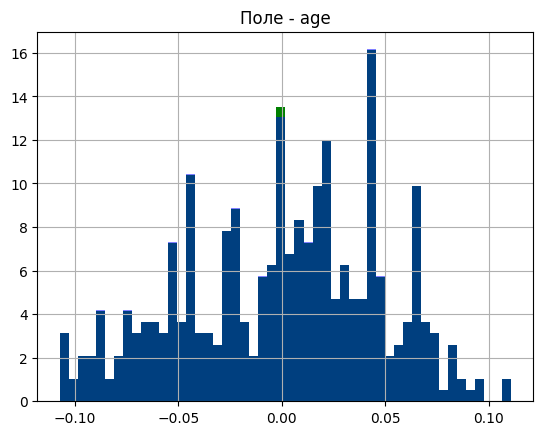

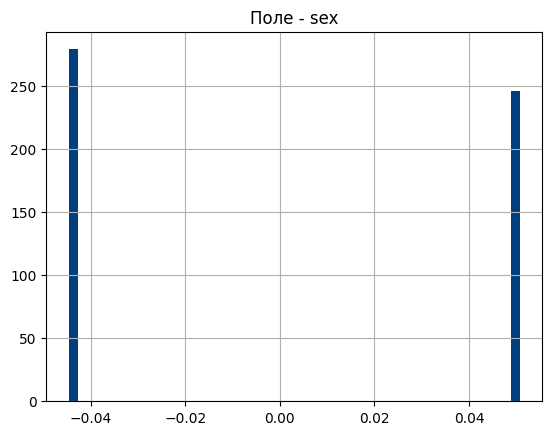

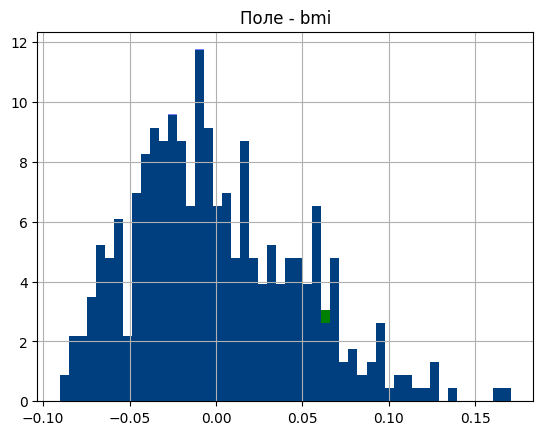

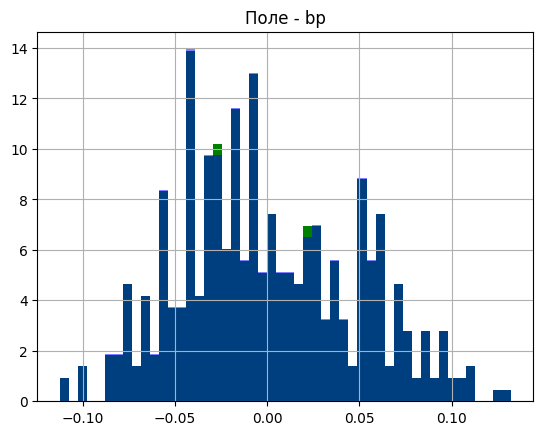

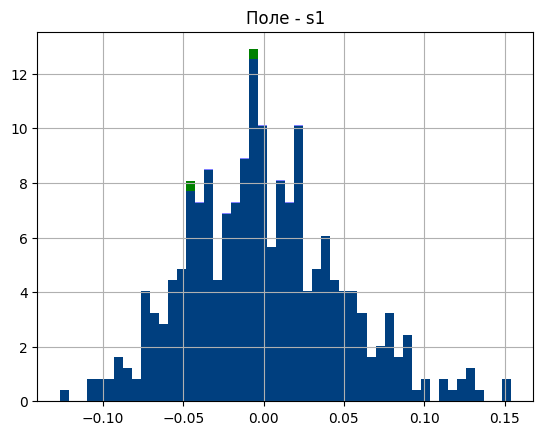

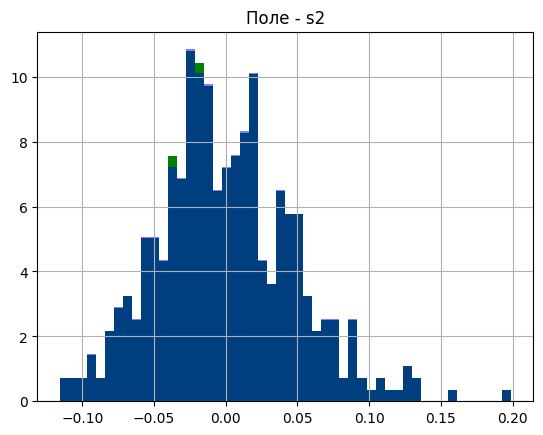

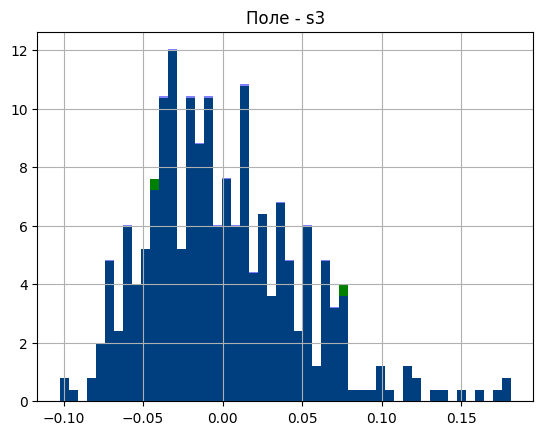

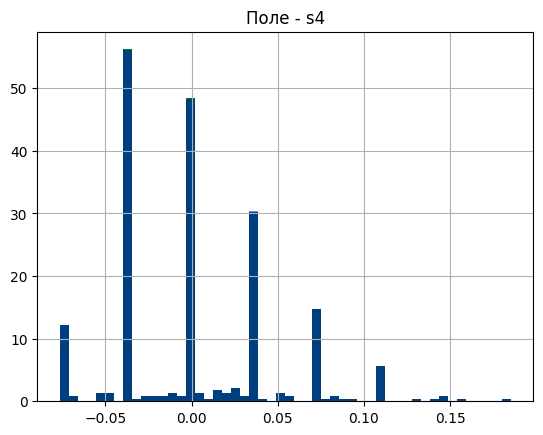

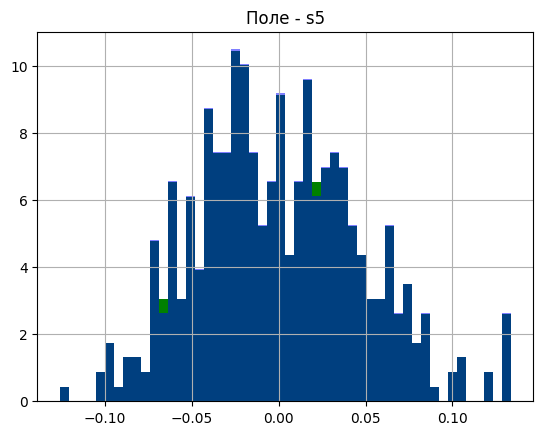

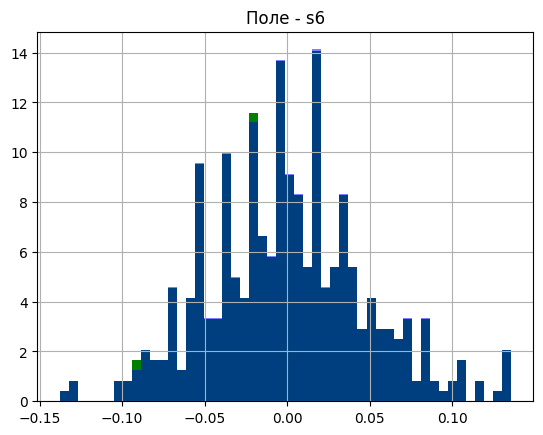

In [ ]:
plot_hist_diff(df,df_drop,diabetes.feature_names)

Заполнение показателями центра распределения и константой

In [ ]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(x)
temp_x1_transformed

array([[ True, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data


In [ ]:
from sklearn.impute import SimpleImputer
all_data, filled_data, missed_data = impute_column(df, 'bmi', 'mean')
all_data

array([ 6.16962065e-02,  1.16721227e-04,  4.44512133e-02, -1.15950145e-02,
       -3.63846922e-02, -4.06959405e-02, -4.71628129e-02, -1.89470584e-03,
        6.16962065e-02,  3.90621530e-02, -8.38084235e-02,  1.75059115e-02,
       -2.88400077e-02, -1.89470584e-03, -2.56065715e-02, -1.80618869e-02,
        4.22955892e-02,  1.21168511e-02, -1.05172024e-02, -1.80618869e-02,
       -5.68631216e-02, -2.23731352e-02, -4.05032999e-03,  6.06183944e-02,
        3.58287167e-02, -1.26728266e-02, -7.73415510e-02,  5.95405824e-02,
       -2.12953232e-02, -6.20595414e-03,  4.44512133e-02, -6.54856182e-02,
        1.25287119e-01, -5.03962492e-02, -6.33299941e-02, -3.09956318e-02,
        2.28949719e-02,  1.10390390e-02,  7.13965152e-02,  1.42724753e-02,
       -8.36157828e-03, -6.76412423e-02, -1.05172024e-02, -2.34509473e-02,
        6.81630790e-02, -3.53068801e-02, -1.15950145e-02, -7.30303027e-02,
       -4.17737526e-02,  1.42724753e-02, -7.28376621e-03,  1.64280994e-02,
       -9.43939036e-03, -

In [ ]:
 missed_data

array([nan])

In [ ]:
filled_data

array([0.00011672])

In [ ]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))

    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))

    new_df = pd.DataFrame({'Исходные данные':original_data})

    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data

    sns.kdeplot(data=new_df)

Снова добавьте несколько нулевых значений

In [ ]:
df.iloc[6, 2] = np.nan
df.iloc[77, 2] = np.nan
df.iloc[88, 2] = np.nan
df.iloc[102, 2] = np.nan

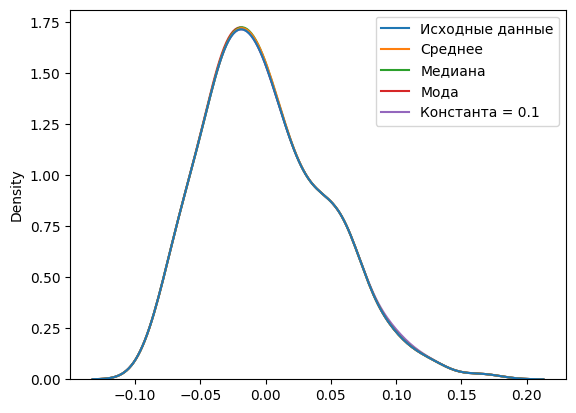

In [ ]:
import seaborn as sns
research_impute_numeric_column(df, 'bmi', 0.1)

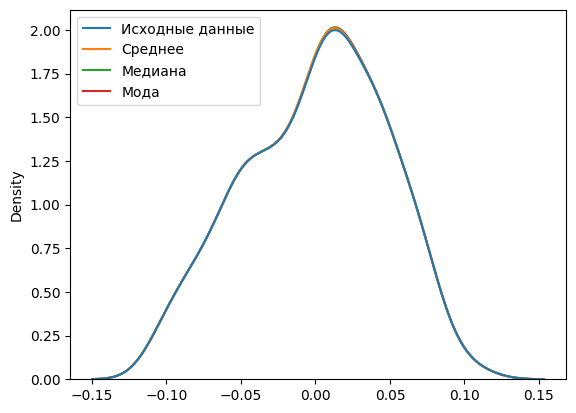

In [ ]:
research_impute_numeric_column(df, 'age')

Заполнение "хвостом распределения"

In [ ]:
bmi_ev = df['bmi'].mean() + 3*df['bmi'].std()

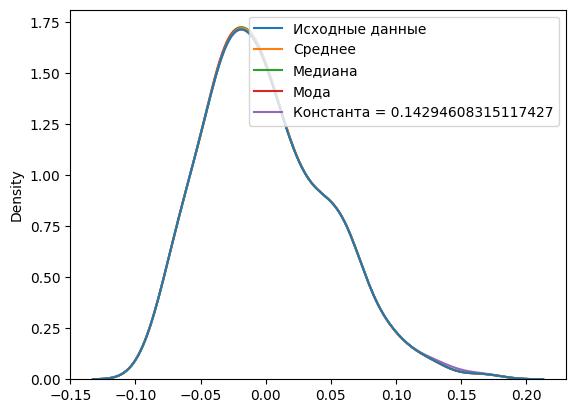

In [ ]:
research_impute_numeric_column(df, 'bmi', bmi_ev)

In [ ]:
#不对称
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)
bmi_ev1 = df['bmi'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, bmi_ev1))

IQR=0.06574653650672879, extreme_value=0.22875707797020728


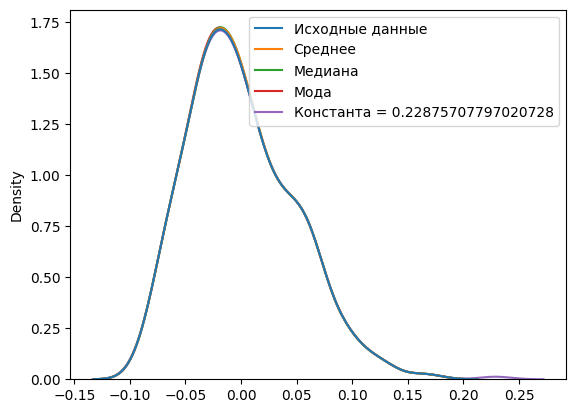

In [ ]:
research_impute_numeric_column(df, 'bmi', bmi_ev1)

In [ ]:

IQR_lf = df['age'].quantile(0.75) - df['age'].quantile(0.25)
age_ev1 = df['age'].quantile(0.75) + 1.5*IQR_lf
age_ev2 = df['age'].quantile(0.75) + 3*IQR_lf

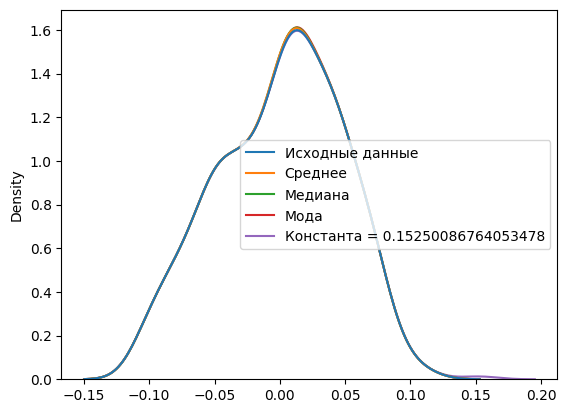

In [ ]:
research_impute_numeric_column(df, 'age', age_ev1)

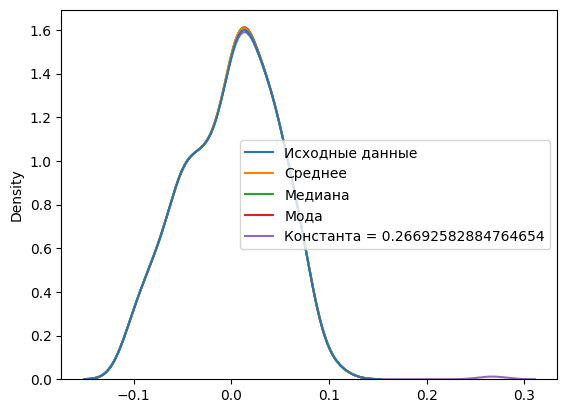

In [ ]:
research_impute_numeric_column(df, 'age',age_ev2)

Заполнение наиболее распространенным значением категории

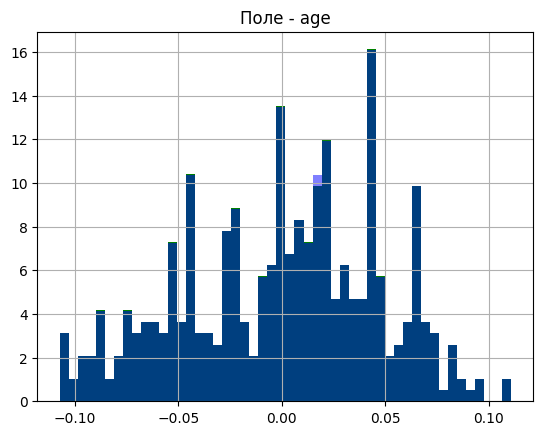

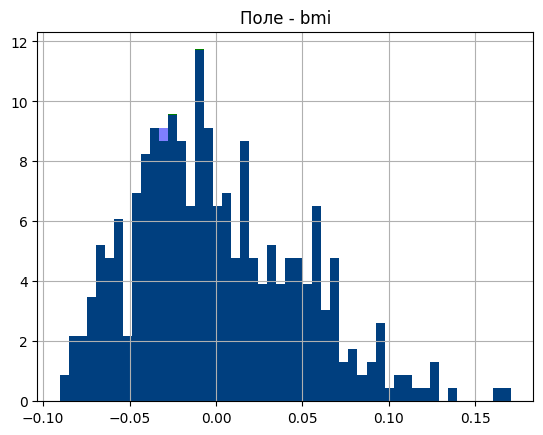

In [ ]:
df_cat_cols = ['age', 'bmi']
df_cat_new = df[df_cat_cols].copy()
#GarageType_cat_new_temp, _, _ = impute_column(df_cat_new, 'GarageType', 'most_frequent')
age_cat_new_temp, _, _ = impute_column(df_cat_new, 'age', 'most_frequent')
bmi_cat_new_temp, _, _ = impute_column(df_cat_new, 'bmi', 'most_frequent')
#df_cat_new['GarageType'] = GarageType_cat_new_temp
df_cat_new['age'] = age_cat_new_temp
df_cat_new['bmi'] = bmi_cat_new_temp
plot_hist_diff(df, df_cat_new, df_cat_cols)


Введение отдельного значения категории для пропущенных значений

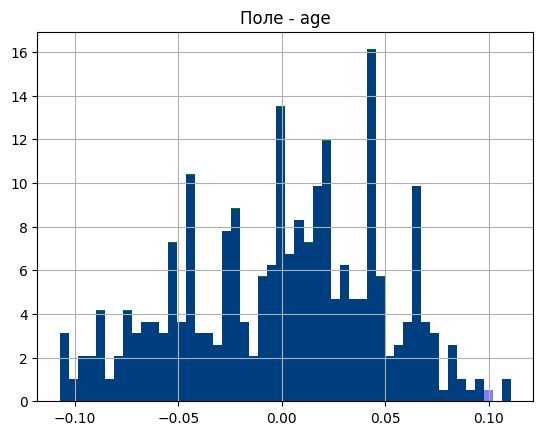

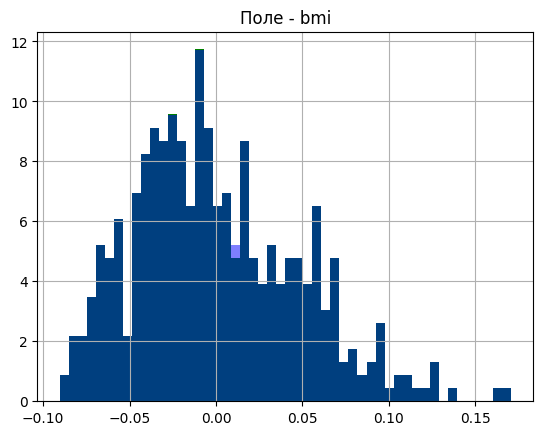

In [ ]:
df_cat_na = df[df_cat_cols].copy()
#GarageType_cat_na_temp, _, _ = impute_column(df_cat_na, 'GarageType', 'constant', fill_value_param='NA')
age_cat_na_temp, _, _ = impute_column(df_cat_na, 'age', 'constant', fill_value_param=0.1)
bmi_cat_na_temp, _, _ = impute_column(df_cat_na, 'bmi', 'constant', fill_value_param=0.01)
#df_cat_na['GarageType'] = GarageType_cat_na_temp
df_cat_na['age'] = age_cat_na_temp
df_cat_na['bmi'] = bmi_cat_na_temp
plot_hist_diff(df, df_cat_na, df_cat_cols)

Добавления флага пропусков

In [ ]:
df_mis = df[['bmi']].copy()
df_mis.head()
indicator = MissingIndicator()
bmi_missing = indicator.fit_transform(df_mis[['bmi']])
bmi_missing_int = [1 if i==True else 0 for i in bmi_missing]
bmi_missing_int[:10]
df_mis['bmi_missing'] = bmi_missing_int
df_mis.head()


,bmi,bmi_missing
0,0.061696,0
1,NaN,1
2,0.044451,0
3,-0.011595,0
4,-0.036385,0


Заполнение значений для нескольких признаков
Импьютация с использованием метода ближайших соседей

In [ ]:
knnimpute_cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

<Axes: ylabel='Density'>

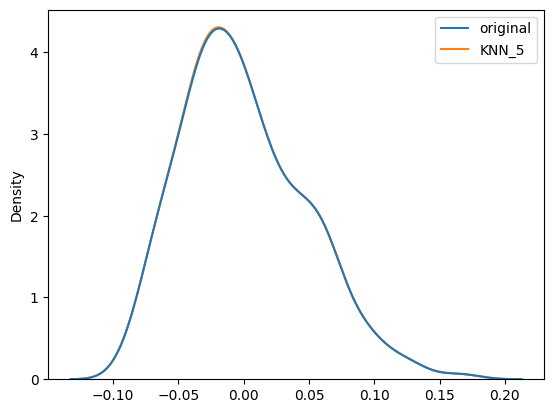

In [ ]:
from sklearn.impute import KNNImputer
knnimpute_df = df[knnimpute_cols].copy()
knnimpute_df.head()
knnimpute_df.isnull().sum()
knnimputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    add_indicator=False,
)
knnimpute_df_imputed_temp = knnimputer.fit_transform(knnimpute_df)
knnimpute_df_imputed = pd.DataFrame(knnimpute_df_imputed_temp, columns=knnimpute_df.columns)
knnimpute_df_imputed.head()
bmi_df = pd.DataFrame({'original': knnimpute_df['bmi'].values})
bmi_df['KNN_5'] = knnimpute_df_imputed['bmi']
sns.kdeplot(data=bmi_df)

<Axes: ylabel='Density'>

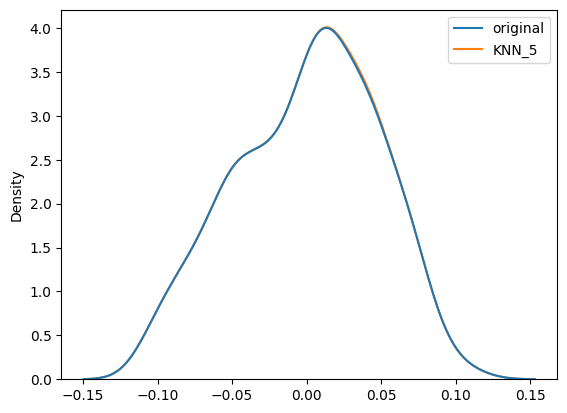

In [ ]:
age_df = pd.DataFrame({'original': knnimpute_df['age'].values})
age_df['KNN_5'] = knnimpute_df_imputed['age']
sns.kdeplot(data=age_df)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])
param_grid = {
    'imputer__n_neighbors': [3,5,10],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(knnimpute_df, df['s1'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799
 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799
 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799 -0.03759799]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        KNNImputer(weights='distance')),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Lasso(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'imputer__add_indicator': [True, False],
                         'imputer__n_neighbors': [3, 5, 10],
                         'imputer__weights': ['uniform', 'distance'],
                         'regressor__alpha': [10, 100, 200]},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'imputer__add_indicator': False,
 'imputer__n_neighbors': 3,
 'imputer__weights': 'uniform',
 'regressor__alpha': 10}

In [ ]:
knnimputer2 = KNNImputer(
    n_neighbors=grid_search.best_params_['imputer__n_neighbors'],
    weights=grid_search.best_params_['imputer__weights'],
    metric='nan_euclidean',
    add_indicator=False,
)
knnimpute_df_imputed_temp2 = knnimputer2.fit_transform(knnimpute_df)
knnimpute_df_imputed2 = pd.DataFrame(knnimpute_df_imputed_temp2, columns=knnimpute_df.columns)
knnimpute_df_imputed2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.028389,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.047163,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='Density'>

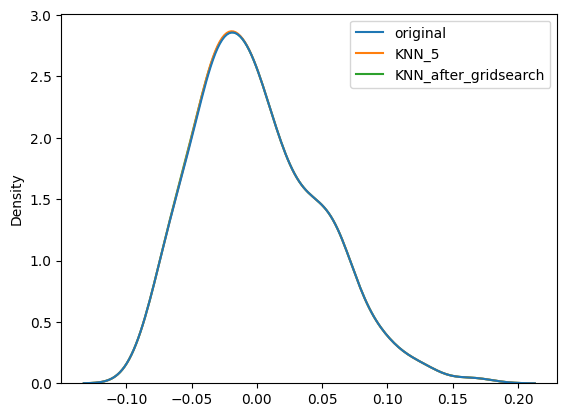

In [ ]:
bmi_df['KNN_after_gridsearch'] = knnimpute_df_imputed2['bmi']
sns.kdeplot(data=bmi_df)

<Axes: ylabel='Density'>

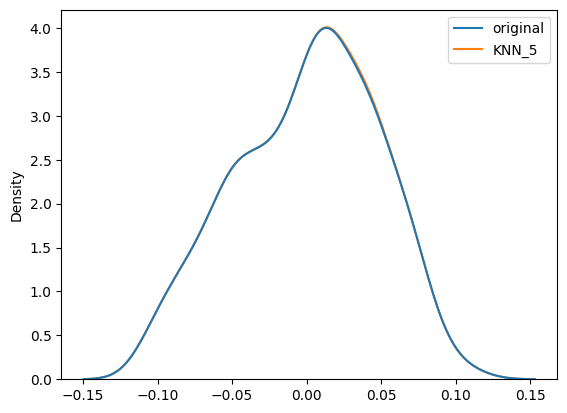

In [ ]:
age_df = pd.DataFrame({'original': knnimpute_df['age'].values})
age_df['KNN_5'] = knnimpute_df_imputed['age']
sns.kdeplot(data=age_df)

Метод MICE (multivariate Imputation of Chained Equations)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer_missForest = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)
#%%time
missForest_df_imputed_temp = imputer_missForest.fit_transform(knnimpute_df)
#Wall time: 5.07 s
missForest_df_imputed = pd.DataFrame(missForest_df_imputed_temp, columns=knnimpute_df.columns)
missForest_df_imputed.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.039166,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.032073,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='Density'>

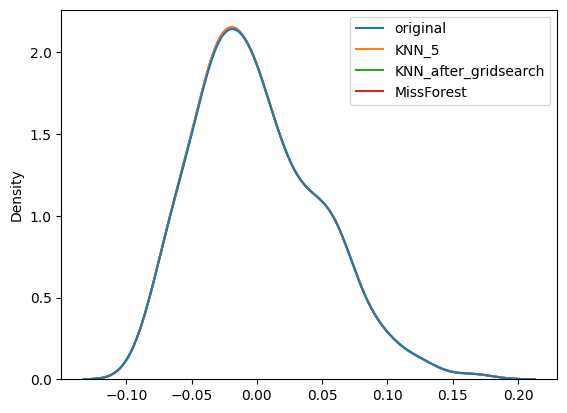

In [ ]:
bmi_df['MissForest'] = missForest_df_imputed['bmi']
sns.kdeplot(data=bmi_df)

<Axes: ylabel='Density'>

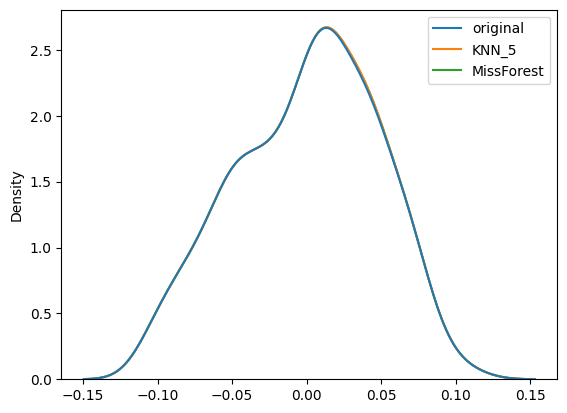

In [ ]:
age_df['MissForest'] = missForest_df_imputed['age']
sns.kdeplot(data=age_df)

### Кодирование категориальных признаков

Для набора данных по обнаружению диабета все функции являются числовыми и не имеют очевидной последовательной связи, поэтому более подходящим является One-Hot Encoding.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder

diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
categorical_feature = 'age'

onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # 稀疏矩阵设置为False以得到稠密矩阵
encoded_feature = onehot_encoder.fit_transform(data[[categorical_feature]])

encoded_feature_df = pd.DataFrame(encoded_feature, columns=[f"{categorical_feature}_{i}" for i in range(encoded_feature.shape[1])])
data_encoded = pd.concat([data.drop(columns=[categorical_feature]), encoded_feature_df], axis=1)

# 打印处理后的数据集
print("data later：")
print(data_encoded.head())


data later：
        sex       bmi        bp        s1        s2        s3        s4  \
0  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592   
3 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592   

         s5        s6  age_0  ...  age_47  age_48  age_49  age_50  age_51  \
0  0.019907 -0.017646    0.0  ...     0.0     0.0     0.0     0.0     0.0   
1 -0.068332 -0.092204    0.0  ...     0.0     0.0     0.0     0.0     0.0   
2  0.002861 -0.025930    0.0  ...     0.0     0.0     0.0     0.0     0.0   
3  0.022688 -0.009362    0.0  ...     0.0     0.0     0.0     0.0     0.0   
4 -0.031988 -0.046641    0.0  ...     0.0     0.0     0.0     0.0     0.0   

   age_52  age_53  age_54  age_55  age_56  
0     0.0     0.0     0.0     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Нормализация числовых признаков

Нормализация числовых признаков
Нормализация числового признака предполагает что на основе существующего признака мы создаем новый признак, который в идеале имеет нормальное распределение.

Многие модели машинного обучения лучше работают с нормализованными признаками, особенно линейные модели.

Какие функции чаще всего используются для нормализации:

логарифм - np.log(X)
обратная зависимость - 1 / X
квадратный корень
возведение в степень
преобразование Бокса-Кокса (Box-Cox transformation)
преобразование Йео-Джонсона (Yeo-Johnson transformation) - расширение метода Бокса-Кокса для работы с произвольными величинами

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

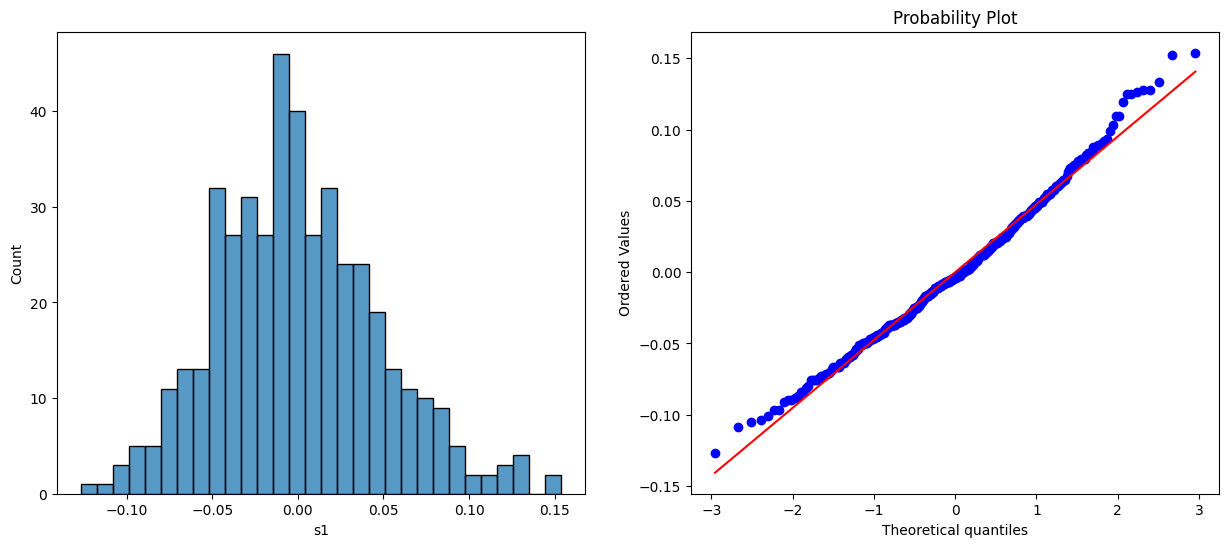

In [ ]:

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
import pandas as pd
data_df = pd.DataFrame(data, columns=diabetes.feature_names)

variable_to_plot = 's1'  # 这里选择要分析的变量名
diagnostic_plots(data_df, variable_to_plot)

Логарифмическое преобразование. Не очень хороший результат.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


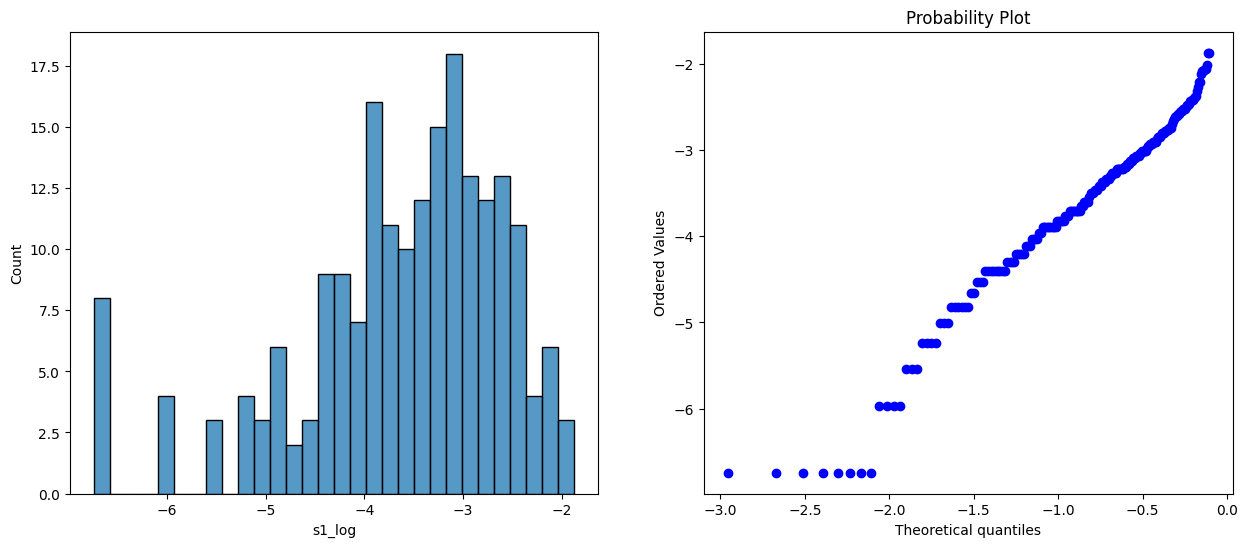

In [ ]:
import numpy as np

def log_transform(data, variable):
    data[variable + '_log'] = np.log(data[variable])
    return data
variable_to_transform = 's1'
data_df = log_transform(data_df, variable_to_transform)

diagnostic_plots(data_df, variable_to_transform + '_log')


Квадратный корень

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


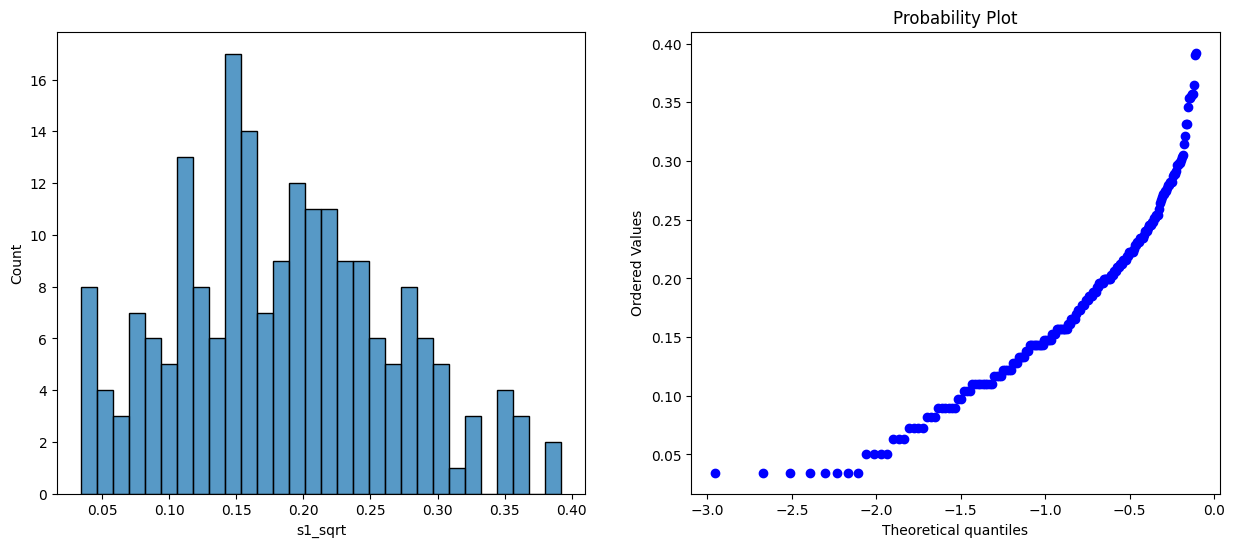

In [ ]:
import numpy as np

def sqrt_transform(data, variable):
    data[variable + '_sqrt'] = np.sqrt(data[variable])
    return data

variable_to_transform = 's1'

data_df = sqrt_transform(data_df, variable_to_transform)
diagnostic_plots(data_df, variable_to_transform + '_sqrt')


Возведение в степень

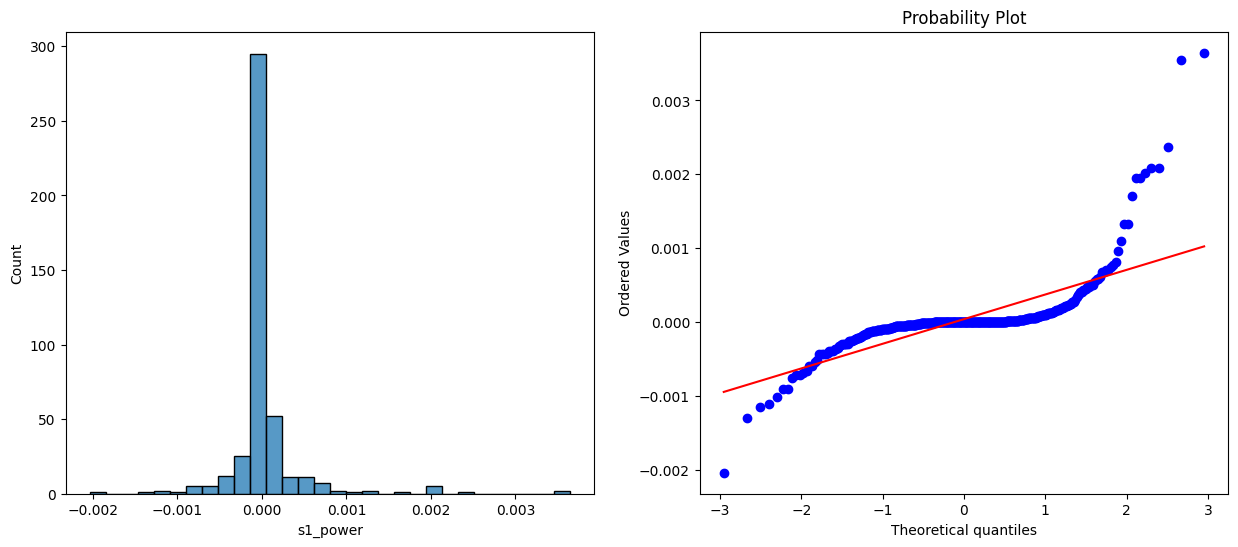

In [ ]:
import numpy as np

def power_transform(data, variable, power):

    data[variable + '_power'] = np.power(data[variable], power)
    return data

variable_to_transform = 's1'
power = 3  # 这里以平方作为示例，你可以根据需要选择其他幂次方

data_df = power_transform(data_df, variable_to_transform, power)

diagnostic_plots(data_df, variable_to_transform + '_power')


Преобразование Йео-Джонсона.Очень хороший результат.

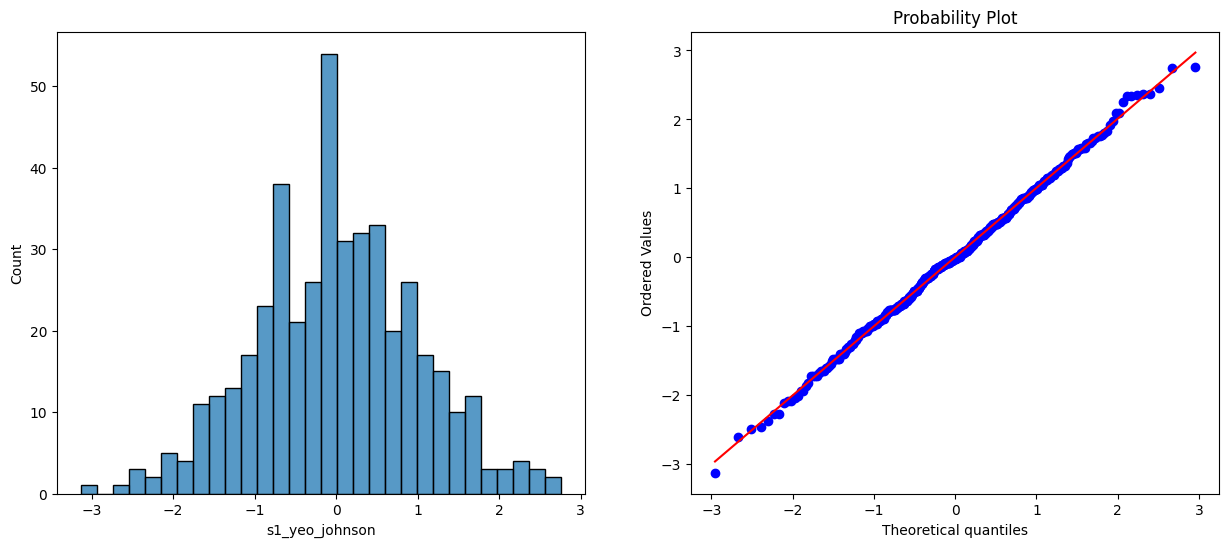

In [ ]:
from sklearn.preprocessing import PowerTransformer

def yeo_johnson_transform(data, variable):

    pt = PowerTransformer(method='yeo-johnson')
    data[variable + '_yeo_johnson'] = pt.fit_transform(data[[variable]])
    return data

variable_to_transform = 's1'

data_df = yeo_johnson_transform(data_df, variable_to_transform)

diagnostic_plots(data_df, variable_to_transform + '_yeo_johnson')
